In [1]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
label_encoder = preprocessing.LabelEncoder() 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestClassifier
scaler = StandardScaler()
from keras.models import Sequential;
from keras.layers import Dense,Activation;
from sklearn.metrics import mean_absolute_error as mae
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from mlxtend.feature_selection import SequentialFeatureSelector

In [2]:
#adding excel file to dataframe
df = pd.read_excel('redfin.xlsx')

In [3]:
#checking columns for data
df.head()

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
0,National,February 2012,159702.0,0.004093,-0.015873,302265,0.103003,0.135593,511432,0.072786,0.056927,2078653,0.011585,-0.164505,98,1,-10,0.958053,0.001865,0.003026
1,NaN,March 2012,170636.0,0.068467,0.041521,390571,0.292149,0.066078,619410,0.211129,-0.048635,2119417,0.019611,-0.165627,93,-4,-13,0.961746,0.003693,0.005927
2,NaN,April 2012,177838.0,0.042203,0.061745,401238,0.027310,0.080962,604699,-0.023749,-0.021595,2155676,0.017108,-0.166588,81,-12,-17,0.965165,0.003418,0.007132
3,NaN,May 2012,186118.0,0.046562,0.084780,460225,0.147012,0.163165,606793,0.003463,0.000391,2164369,0.004033,-0.171791,73,-8,-17,0.968508,0.003343,0.009659
4,NaN,June 2012,193679.0,0.040623,0.074389,483669,0.050941,0.095785,573030,-0.055643,-0.029948,2147108,-0.007975,-0.174069,68,-4,-15,0.970363,0.001856,0.010254


MILESTONE 2: Deal with missing data (do not just drop rows or columns without justifying this)

For this project we are looking at data as it's changed in about a decade of data. Below we see that the only null value is in the region column. This column is not needed for analysis since we're looking at the US as a whole and not on a region by region basis. If we do look at differing regions later on, we can look at the original data and create a new dataset based on region. So, for now, we'll just remove this column all together. There doesn't appear to be any other missing data that needs to be removed. 

In [4]:
#this checks for null values and data type for every column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Region                     7 non-null      object 
 1   Month of Period End        952 non-null    object 
 2   Median Sale Price          952 non-null    float64
 3   Median Sale Price MoM      952 non-null    float64
 4   Median Sale Price YoY      952 non-null    float64
 5   Homes Sold                 952 non-null    int64  
 6   Homes Sold MoM             952 non-null    float64
 7   Homes Sold YoY             952 non-null    float64
 8   New Listings               952 non-null    int64  
 9   New Listings MoM           952 non-null    float64
 10  New Listings YoY           952 non-null    float64
 11  Inventory                  952 non-null    int64  
 12  Inventory MoM              952 non-null    float64
 13   Inventory YoY             952 non-null    float64

In [71]:
df['Homes Sold'] = df['Homes Sold'].astype(float)

In [72]:
#dropped column and confirmed removed
df = df.drop(['Region'], axis = 1)
df.head()

KeyError: "['Region'] not found in axis"

In [ ]:
#looking to see if there are any other nan values after the region column has been removed 
df.isna().sum()

In [ ]:
df.describe()

MILESTONE 2: Drop any features that are not useful for your model building and explain why they are not useful

I Removed any columns that had month over month or year over year in the name. This is because, since they're an average based on the previous month, it doesn't help with our data in being able to see what features will affect the median home price for the future. 

In [ ]:
#removing any column with MoM or YoY since it doesn't help with this analysis
df2 = df.drop(df.columns[[2,3,5,6,8,9,11,12,14,15,17,18]],axis = 1)
#confirming all columns were removed
df2

MILESTONE 2
When looking at the original data, it first starts with the national average from 2012 until 2023. Then it moves on to regional data like Boston, or Chicago. Then it goes through that specific region from 2012 until 2023, before moving on to the next one. To simplify things, I would like to only look at the national averages so I'll be removing all other region specific data. However, because of this, this dataset doesn't have as much data that I had originally thought. So, I went to two different websites that had data for the last decade on a month to month basis for inflation and mortgage rates, both things that should have an affect on the median sale price of homes, and combined them with this dataframe. To do that, I had to adjust the Index for several dataframes because if one dataframe started its index at 0, while another started at 1, it combines the data based on the index it, which wouldn't align correctly. 

In [73]:
#removing any data from the other regions
df2 = df2.iloc[:136]
df2

,Month of Period End,Median Sale Price,Homes Sold,New Listings,Inventory,Days on Market,Average Sale To List
1,February 2012,159702.0,302265,511432,2078653,98,0.958053
2,March 2012,170636.0,390571,619410,2119417,93,0.961746
3,April 2012,177838.0,401238,604699,2155676,81,0.965165
4,May 2012,186118.0,460225,606793,2164369,73,0.968508
5,June 2012,193679.0,483669,573030,2147108,68,0.970363
...,...,...,...,...,...,...,...
132,January 2023,382498.0,277701,388388,941913,52,0.978393
133,February 2023,386625.0,329045,406704,905902,52,0.982215
134,March 2023,400482.0,447842,541398,909167,44,0.988599
135,April 2023,407775.0,413158,516000,896721,36,0.995039


In [74]:
#reseting the index to 1 to help with combining multiple datasets
df2.index = pd.RangeIndex(start=1, stop=1+len(df2), step=1)
df2

,Month of Period End,Median Sale Price,Homes Sold,New Listings,Inventory,Days on Market,Average Sale To List
1,February 2012,159702.0,302265,511432,2078653,98,0.958053
2,March 2012,170636.0,390571,619410,2119417,93,0.961746
3,April 2012,177838.0,401238,604699,2155676,81,0.965165
4,May 2012,186118.0,460225,606793,2164369,73,0.968508
5,June 2012,193679.0,483669,573030,2147108,68,0.970363
...,...,...,...,...,...,...,...
132,January 2023,382498.0,277701,388388,941913,52,0.978393
133,February 2023,386625.0,329045,406704,905902,52,0.982215
134,March 2023,400482.0,447842,541398,909167,44,0.988599
135,April 2023,407775.0,413158,516000,896721,36,0.995039


Next I would like to add a few more features to this list to see what else could have an effect on the price of homes. This first one is a list of the inflation rates each month since 2012. This data was collected from the US Bureau of Labor Statistics I will need to remove certain months so that it matches what my original dataframe is, which is Feb of 2012 until May of 2023.  

In [75]:
#importing the inflation csv
df_i = pd.read_csv('inflation.csv')

In [76]:
#dropping everything that's not in a certain location range
df_i = df_i.iloc[1:137]
df_i

,Series Id,Year,Period,Value
1,CUUR0000SA0L1E,2012,M02,0.3
2,CUUR0000SA0L1E,2012,M03,0.4
3,CUUR0000SA0L1E,2012,M04,0.2
4,CUUR0000SA0L1E,2012,M05,0.1
5,CUUR0000SA0L1E,2012,M06,0.1
...,...,...,...,...
132,CUUR0000SA0L1E,2023,M01,0.6
133,CUUR0000SA0L1E,2023,M02,0.7
134,CUUR0000SA0L1E,2023,M03,0.5
135,CUUR0000SA0L1E,2023,M04,0.5


In [77]:
#dropping unneccesary columns
df_i = df_i.drop(['Series Id','Year', 'Period'], axis = 1)
df_i

,Value
1,0.3
2,0.4
3,0.2
4,0.1
5,0.1
...,...
132,0.6
133,0.7
134,0.5
135,0.5


In [78]:
#confirming no missing data
df_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 1 to 136
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   136 non-null    float64
dtypes: float64(1)
memory usage: 1.2 KB


In [79]:
#making a copy so that I can go back to the df2 to use if needed for different analysis
df3= df2.copy()

In [80]:
#adding on the new column into our dataframe to include inflataion
df3['inflation'] = df_i
df3

,Month of Period End,Median Sale Price,Homes Sold,New Listings,Inventory,Days on Market,Average Sale To List,inflation
1,February 2012,159702.0,302265,511432,2078653,98,0.958053,0.3
2,March 2012,170636.0,390571,619410,2119417,93,0.961746,0.4
3,April 2012,177838.0,401238,604699,2155676,81,0.965165,0.2
4,May 2012,186118.0,460225,606793,2164369,73,0.968508,0.1
5,June 2012,193679.0,483669,573030,2147108,68,0.970363,0.1
...,...,...,...,...,...,...,...,...
132,January 2023,382498.0,277701,388388,941913,52,0.978393,0.6
133,February 2023,386625.0,329045,406704,905902,52,0.982215,0.7
134,March 2023,400482.0,447842,541398,909167,44,0.988599,0.5
135,April 2023,407775.0,413158,516000,896721,36,0.995039,0.5


MILESTONE 2: Transform features if necessary.
    The below data is going to be working on the End of Month data. I'm running a train/test on the data but this needs to be numerical. Since the month/year are very important for determining how much a house is worth, it needs to be included into the data. The current column has month and year included which makes it difficult to get a dummy column. So, first I made a list of all strings to remove and went through the column to remove all of the month names. Then, I created a dummy column to replace it by, which basically turned every year into a specific number. This way the the year data can be used for the train/test and it should still be pretty accurate since we're looking at data over such a large time period. 

In [81]:
#copying the data that I want to change to make sure it doesn't affect the other data
df4= df3[['Month of Period End']].copy()

In [82]:
#renaming this column to something easier
df4.rename(columns={'Month of Period End': 'year'}, inplace=True)

In [83]:
#a list of values to remove
df_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [84]:
#removing all words from list from the column year, which will leave us with just the years leftover
df4['year'] = df4['year'].apply(lambda x: ' '.join([word for word in x.split() if word not in (df_names)]))

In [85]:
#verifying that only years are left
df4

,year
1,2012
2,2012
3,2012
4,2012
5,2012
...,...
132,2023
133,2023
134,2023
135,2023


MILESTONE 2: Create dummy variables if necessary ///// MILESTONE 2: Engineer new useful features
    The below code is changing all years to dummy variables. 

In [86]:
#labeling
df4['year'] =  label_encoder.fit_transform(df4['year'])

In [87]:
#each year will now be labeled with a different number. 
df4['year'] = LabelEncoder().fit_transform(df4['year'])

In [88]:
df4

,year
1,0
2,0
3,0
4,0
5,0
...,...
132,11
133,11
134,11
135,11


In [89]:
#adding on the year column to the original data for future use
df3['year'] = df4['year']

In [90]:
#removing the month to year column since it's a string and unneeded for the following data transformation
df3 = df3.drop(['Month of Period End'], axis = 1)

In [91]:
#confirming that the year column is added at the end and the month of period column is removed
df3

,Median Sale Price,Homes Sold,New Listings,Inventory,Days on Market,Average Sale To List,inflation,year
1,159702.0,302265,511432,2078653,98,0.958053,0.3,0
2,170636.0,390571,619410,2119417,93,0.961746,0.4,0
3,177838.0,401238,604699,2155676,81,0.965165,0.2,0
4,186118.0,460225,606793,2164369,73,0.968508,0.1,0
5,193679.0,483669,573030,2147108,68,0.970363,0.1,0
...,...,...,...,...,...,...,...,...
132,382498.0,277701,388388,941913,52,0.978393,0.6,11
133,386625.0,329045,406704,905902,52,0.982215,0.7,11
134,400482.0,447842,541398,909167,44,0.988599,0.5,11
135,407775.0,413158,516000,896721,36,0.995039,0.5,11


MILESTONE 2
Next I am adding in mortage rate percent data that I obtained from a Freddie Mac website. This is just an average of what the 30 year fixed loan was at the end of each month in the United states. 

In [92]:
#adding in data from with mortgage rates from feb 2012 to may 2023. data is from Freddie Mac.
df_m = pd.read_csv("mortgage.csv")
df_m

,DATE,MORTGAGE30US
0,2012-02-01,3.8900
1,2012-03-01,3.9540
2,2012-04-01,3.9100
3,2012-05-01,3.7980
4,2012-06-01,3.6750
...,...,...
131,2023-01-01,6.2725
132,2023-02-01,6.2575
133,2023-03-01,6.5440
134,2023-04-01,6.3425


In [93]:
#dropping the date column since it's not needed
df_m = df_m.drop(["DATE"], axis=1)
df_m

,MORTGAGE30US
0,3.8900
1,3.9540
2,3.9100
3,3.7980
4,3.6750
...,...
131,6.2725
132,6.2575
133,6.5440
134,6.3425


In [94]:
#reseting the index to 1 to help with combining multiple datasets
df_m.index = pd.RangeIndex(start=1, stop=1+len(df_m), step=1)
df_m

,MORTGAGE30US
1,3.8900
2,3.9540
3,3.9100
4,3.7980
5,3.6750
...,...
132,6.2725
133,6.2575
134,6.5440
135,6.3425


In [95]:
#combining dataframes
df3['mortgage_rate_percent'] = df_m
df3

,Median Sale Price,Homes Sold,New Listings,Inventory,Days on Market,Average Sale To List,inflation,year,mortgage_rate_percent
1,159702.0,302265,511432,2078653,98,0.958053,0.3,0,3.8900
2,170636.0,390571,619410,2119417,93,0.961746,0.4,0,3.9540
3,177838.0,401238,604699,2155676,81,0.965165,0.2,0,3.9100
4,186118.0,460225,606793,2164369,73,0.968508,0.1,0,3.7980
5,193679.0,483669,573030,2147108,68,0.970363,0.1,0,3.6750
...,...,...,...,...,...,...,...,...,...
132,382498.0,277701,388388,941913,52,0.978393,0.6,11,6.2725
133,386625.0,329045,406704,905902,52,0.982215,0.7,11,6.2575
134,400482.0,447842,541398,909167,44,0.988599,0.5,11,6.5440
135,407775.0,413158,516000,896721,36,0.995039,0.5,11,6.3425


In [138]:
#setting the target and feature variables
x = df3.drop(['Median Sale Price'], axis = 1)
y = df3['Median Sale Price']

In [139]:
x.shape

(136, 8)

In [140]:
y.shape

(136,)

MILESTONE 3: building a model

In [141]:
#train/test split with 30/70 split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [142]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(95, 8) (41, 8) (95,) (41,)


In [143]:
# fit the model
model = RandomForestClassifier(random_state=1)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [144]:
# make predictions
yhat = model.predict(x_test)

In [145]:
#rmse value
rmse = np.sqrt(mean_squared_error(y_test, yhat))
print('RMSE:', rmse)

RMSE: 25078.004855095533


In [146]:
#report out r2-value
#r2-value is above 94%! 
r2 = r2_score(y_test, yhat)
print('R2:',r2)

R2: 0.8773455088481933


In [147]:
# calculate MAE
error = mae(y_test, yhat)
  
# display
print("Mean absolute error : " + str(error))

Mean absolute error : 14508.536585365853


In [148]:
lr = LinearRegression()

In [149]:
lr = lr.fit(x_train, y_train)

In [150]:
#ran linear regression and predict
pred = lr.predict(x_test)

In [151]:
#rmse value
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE:', rmse)

RMSE: 7811.749038132366


In [152]:
#report out r2-value
#r2-value is above 98%! 
r2 = r2_score(y_test, pred)
print('R2:',r2)

R2: 0.9880987095005416


In [153]:
# calculate MAE
error = mae(y_test, pred)
  
# display
print("Mean absolute error : " + str(error))

Mean absolute error : 6199.482349509197


In [164]:
sel_bes = SelectKBest(score_func = chi2, k=5)

In [165]:
sel_bes.fit(x_test, y_test)

SelectKBest(k=5, score_func=<function chi2 at 0x000001BFFE8D3DC0>)

In [161]:
#the best features for the target value. 
print(x.columns[sel_bes.get_support()].to_numpy())

['Homes Sold' 'New Listings' 'Inventory' 'Days on Market' 'year']


In [52]:
#decision tree
train_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 0)

In [53]:
train_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [54]:
y_pred_tree = train_tree.predict(x_test)

In [55]:
#rmse value
rmse = np.sqrt(mean_squared_error(y_test, y_pred_tree))
print('RMSE:', rmse)

RMSE: 110802.71196524776


In [56]:
#report out r2-value
#r2-value is -2.12??%! 
r2 = r2_score(y_test, y_pred_tree)
print('R2:',r2)

R2: -2.183340633827511


In [57]:
# calculate MAE
error = mae(y_test, y_pred_tree)
  
# display
print("Mean absolute error : " + str(error))

Mean absolute error : 92588.90243902439


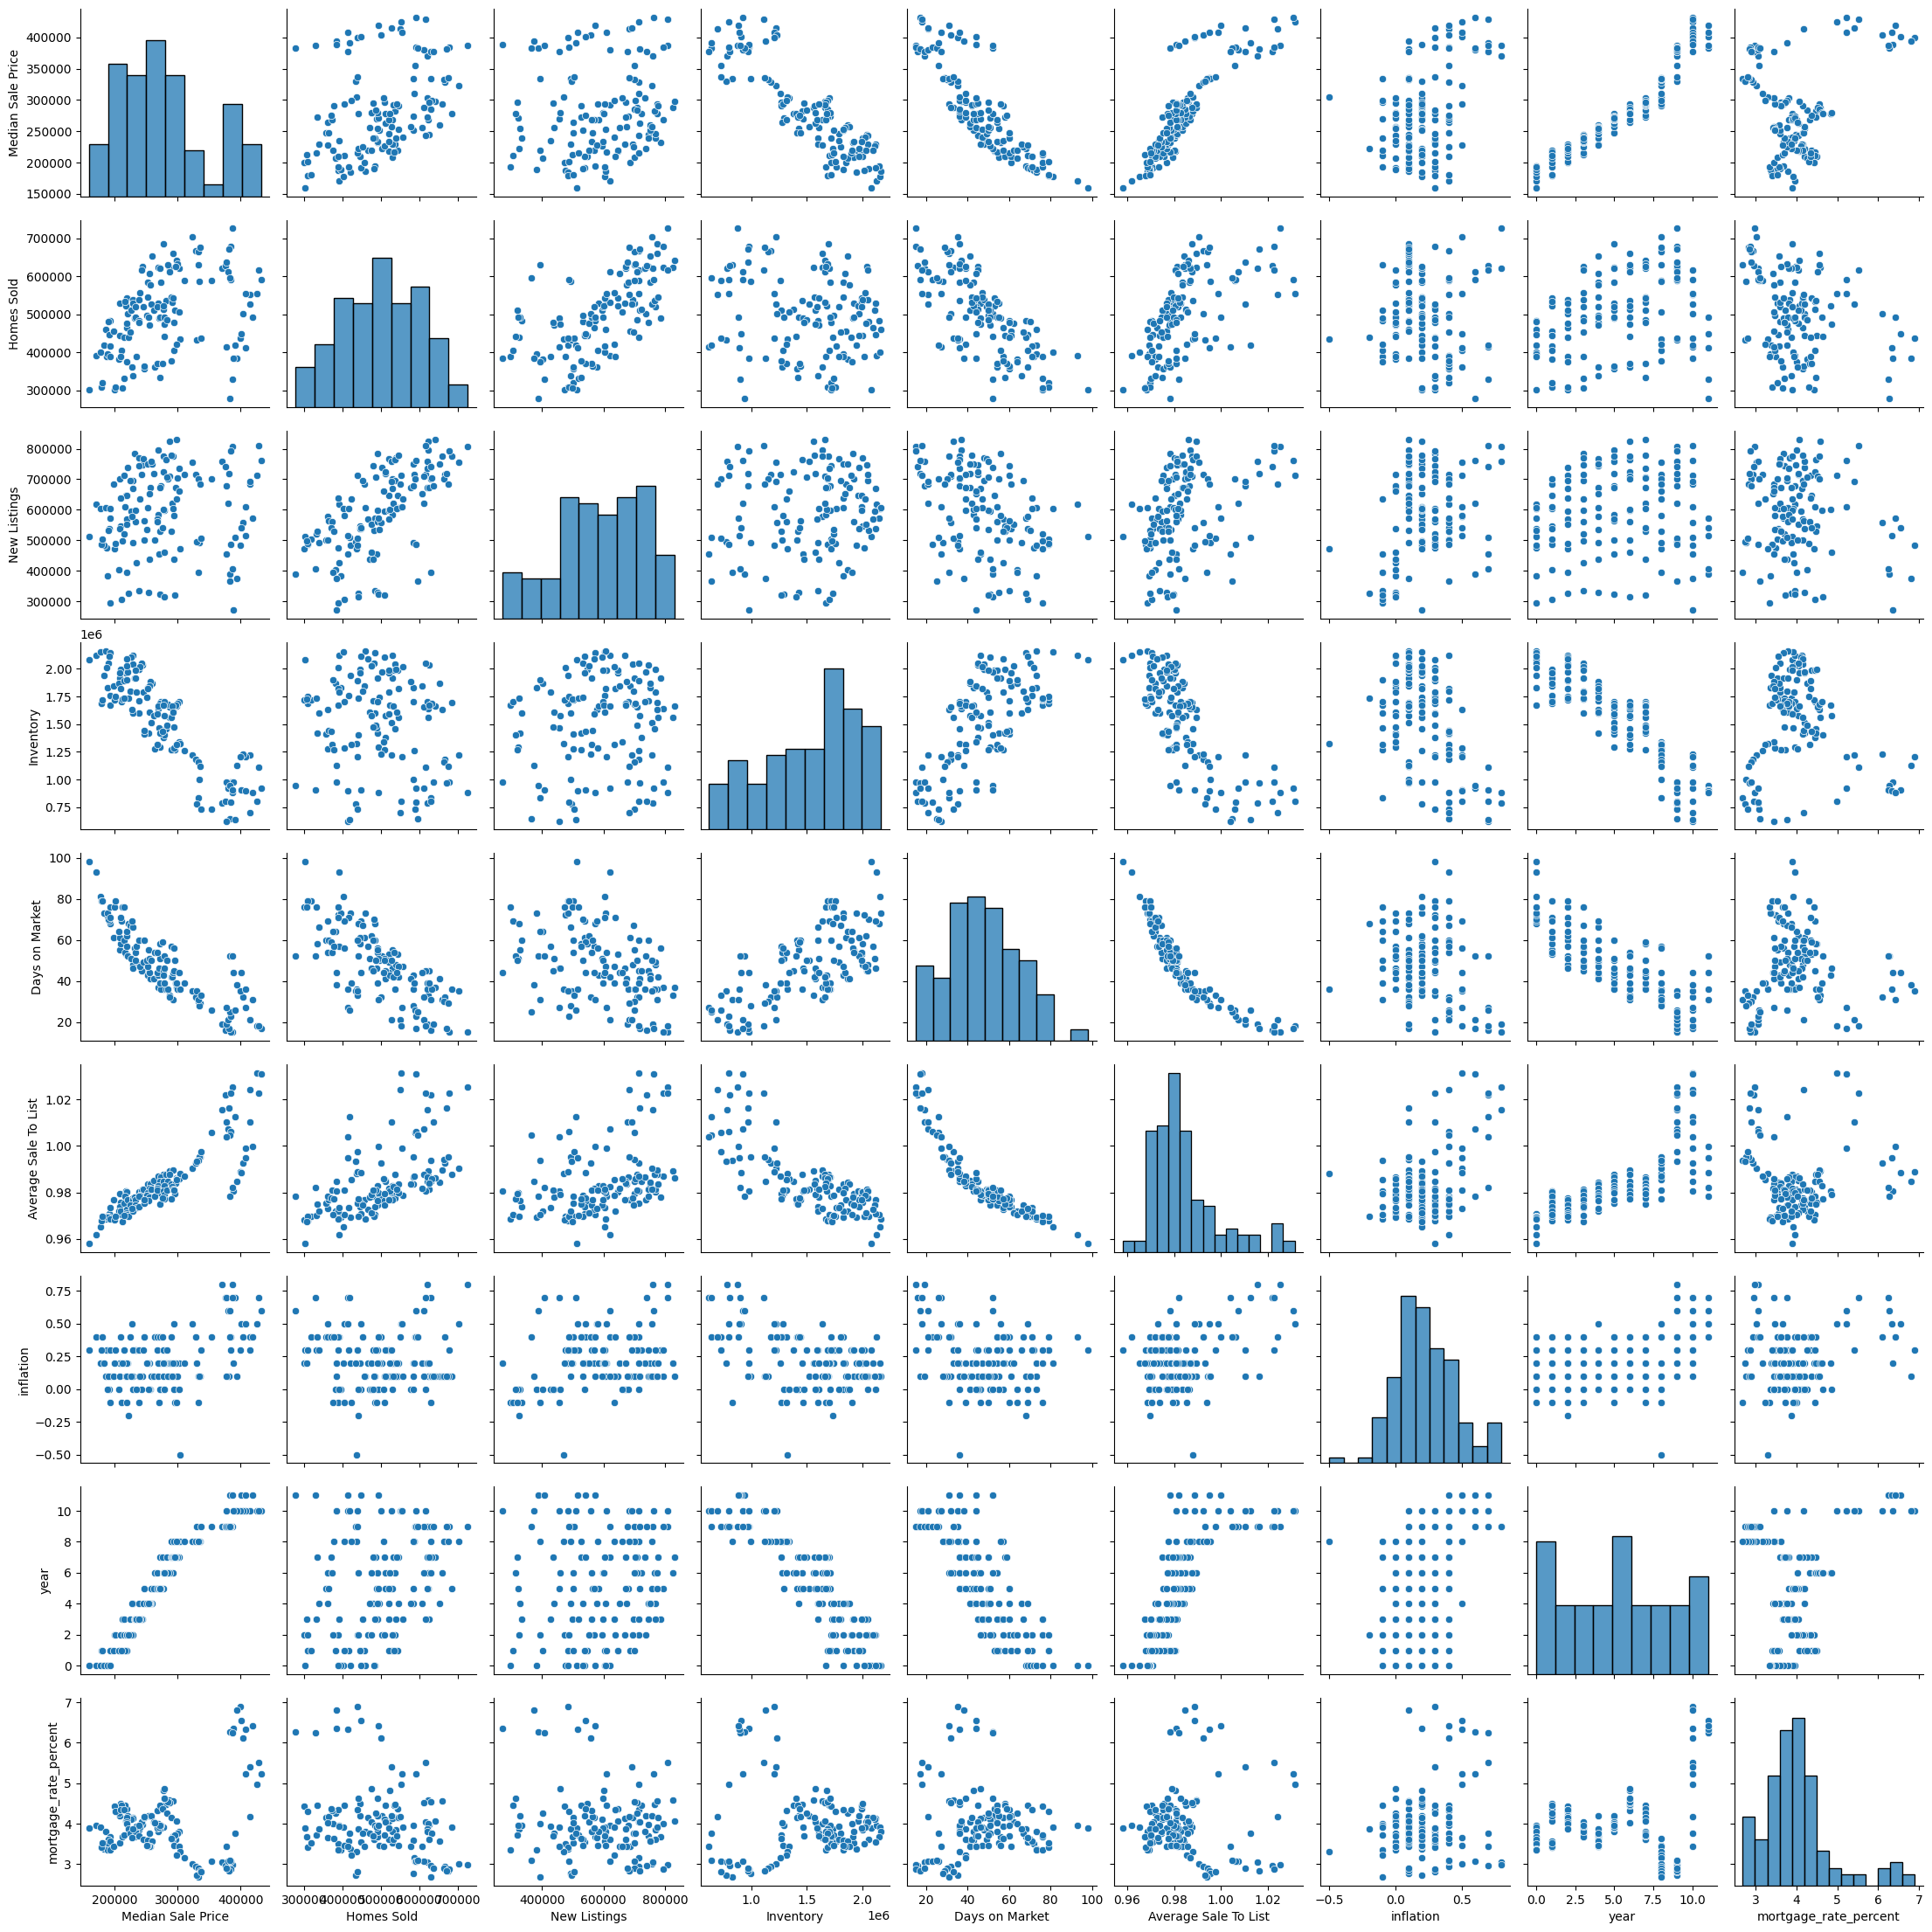

In [58]:
#MILSTONE1:
#pairplot of all numeric variables
sns.pairplot(df3)
plt.show()

MILESTONE 1: the below heatmap is so that we can see which features are most correlated. The year appears to be correlated to Median Sale Price the most. This makes sense as homes prices have risen the most year over year. The second most correlated is Inventory, though it's inversely correlated. Meaning that as the number of inventory deceases, the median sale price increases. 

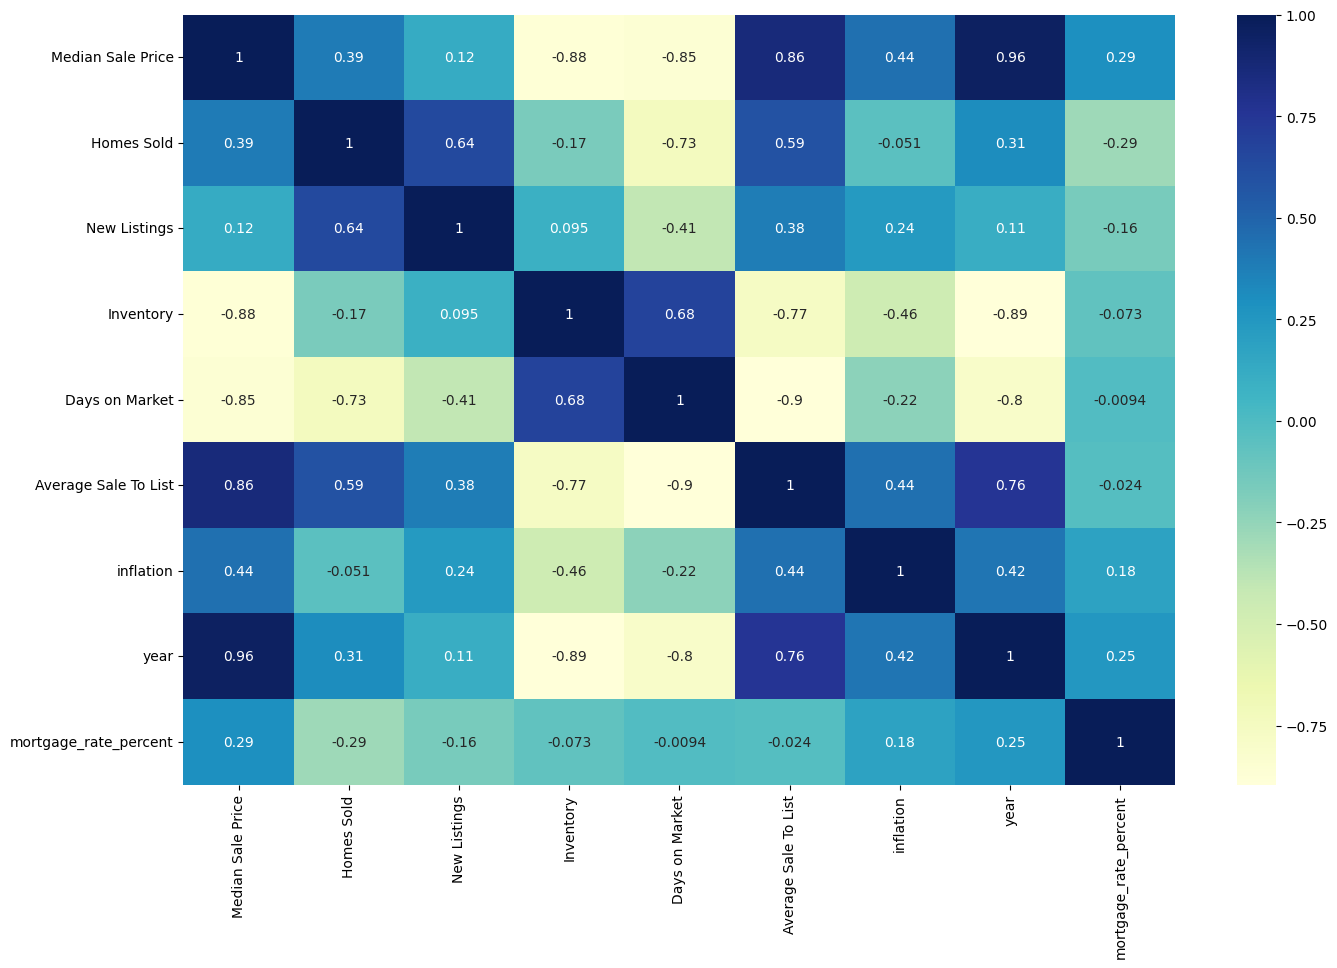

In [59]:
plt.figure(figsize = (16, 10))
sns.heatmap(df3.corr(), annot = True, cmap="YlGnBu")
plt.show()

MILSTONE1: The below plot figure is based on the Median Sale price from 2012 into 2023. You can see that the price has risen from 150000 to 550000, more than tripling within the decade. 

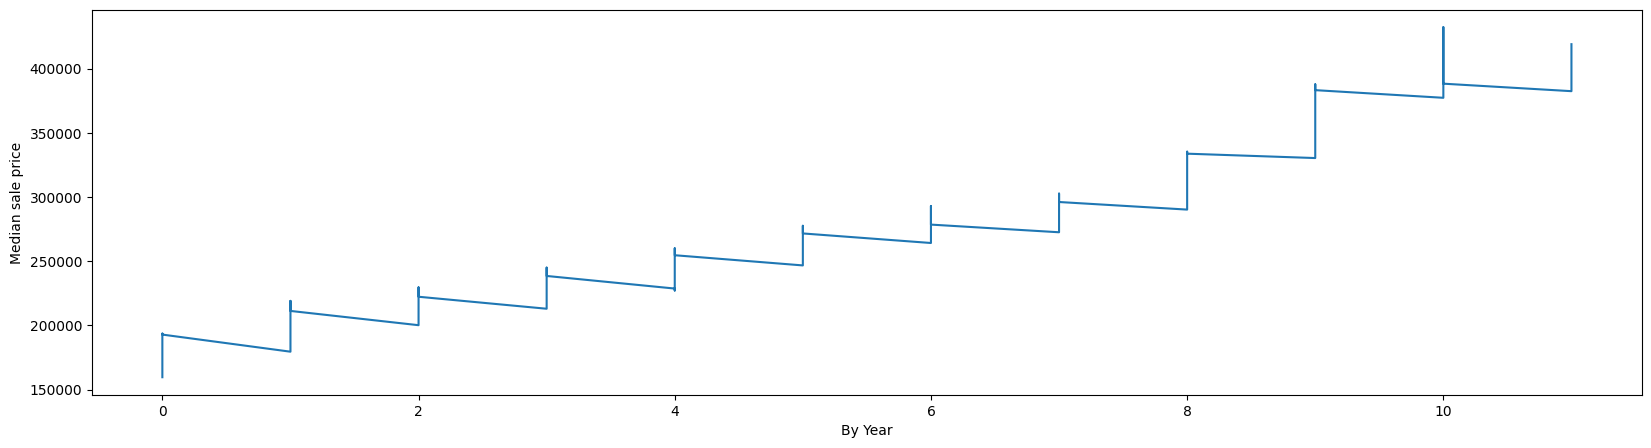

In [60]:
#line graph
plt.figure(figsize=(20,5))
plt.plot(df3['year'], df3['Median Sale Price'])
plt.ylabel('Median sale price')
plt.xlabel('By Year')
plt.show()

MILESTONE 1!! 
The below graph is looking at how the average sale to list price has changed by year. We can see that people used to offer a little under the listing price and it would usually sell for that much, with a few outliers. this stayed relatively the same until year 8, or 2020. Then, not only were more homes being sold above asking price, but there was a much greater range for this, then the previous years. However, it's possible that this is starting to slow down from the 2023 data. Will definitely need to keep monitoring these numbers in the future. 

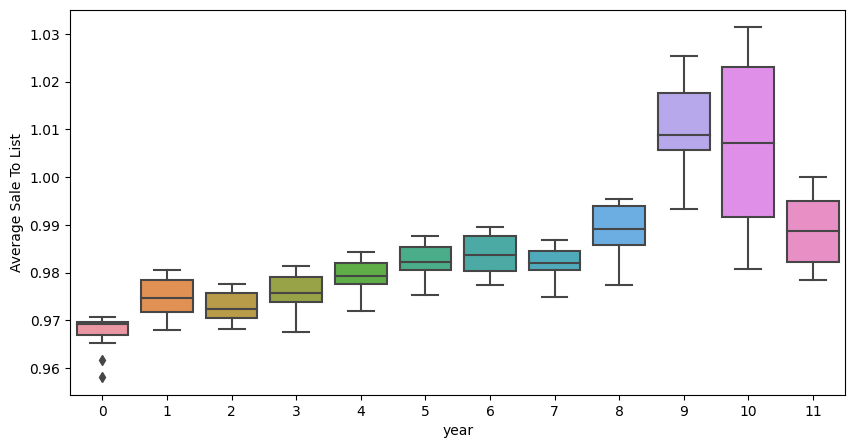

In [61]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'year', y = 'Average Sale To List', data = df3)
plt.show()

MILESTONE 1!!!
Below we are comparing the median sale price and the average sale to list price. You would think that, as the prices of the home increase, the sale to list price, would decrease. However, due to the decrease in inventory, without a decrease in demand, that we can see in a later graph, this is why the sale to list price and median sale price are both rising so quickyl. However, There does appear to be a major drop once the house hits a certain price, which appears to be around $400,000. 

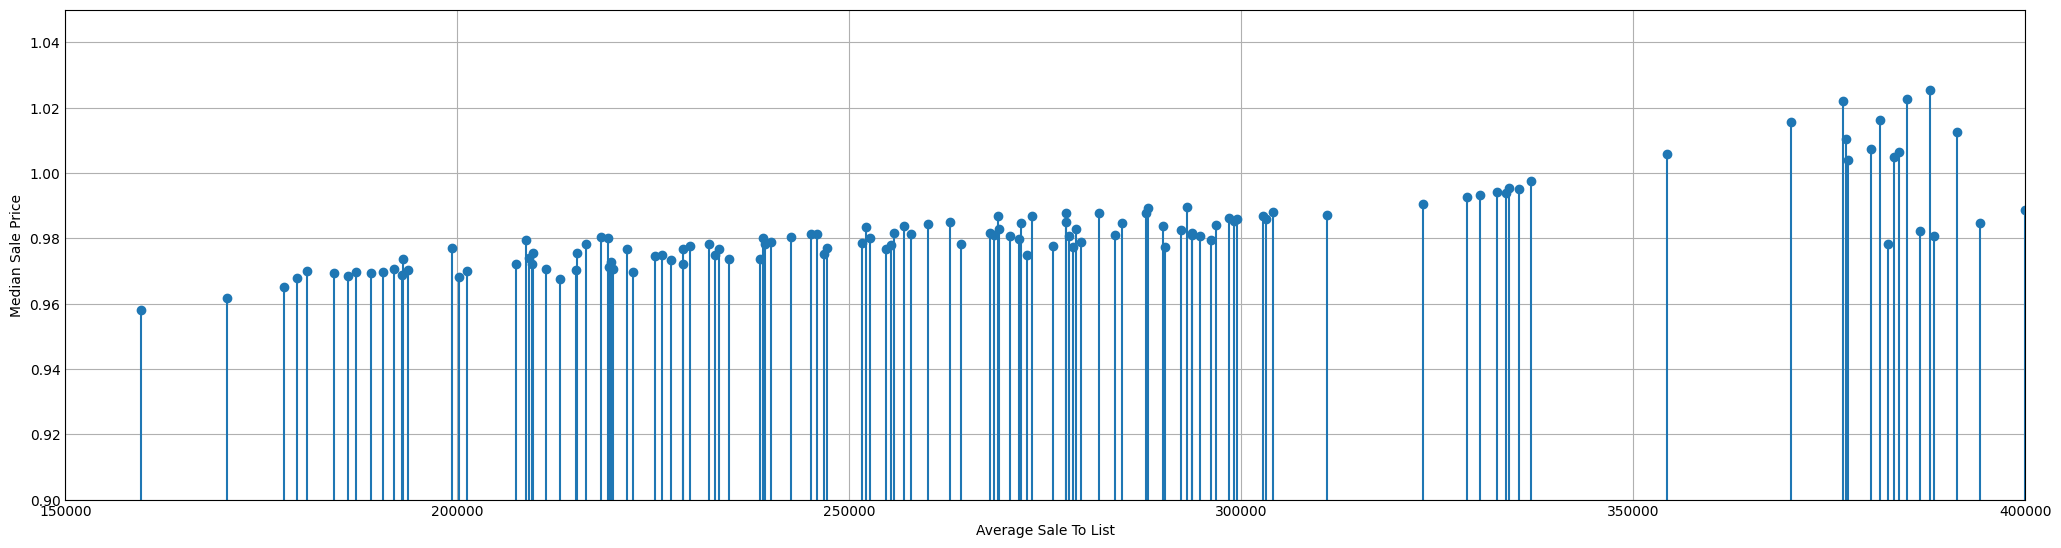

In [62]:
plt.style.use('_mpl-gallery')

# make data
x = df3['Median Sale Price']
y = df3['Average Sale To List']

# plot
fig, ax = plt.subplots(figsize=(20,5))

ax.stem(x, y)

ax.set_ylabel('Median Sale Price')
ax.set_xlabel('Average Sale To List')

plt.xlim(150000, 400000)
plt.ylim(0.9, 1.05)


plt.show()

MILSTONE1:The next graph we want to look at the number of homes sold. So, in 2012, there were almost 500,000 homes sold. While, in 2023 we are seeing about the same number of homes sold. So, even with a rising population, and more homes being built every year, the same number of homes are being sold. This might mean that the growth in population or homes hasn't been significant enough in the last decade or that there is something that's preventing people from putting their homes on the market even though there are more homes total in the united states. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


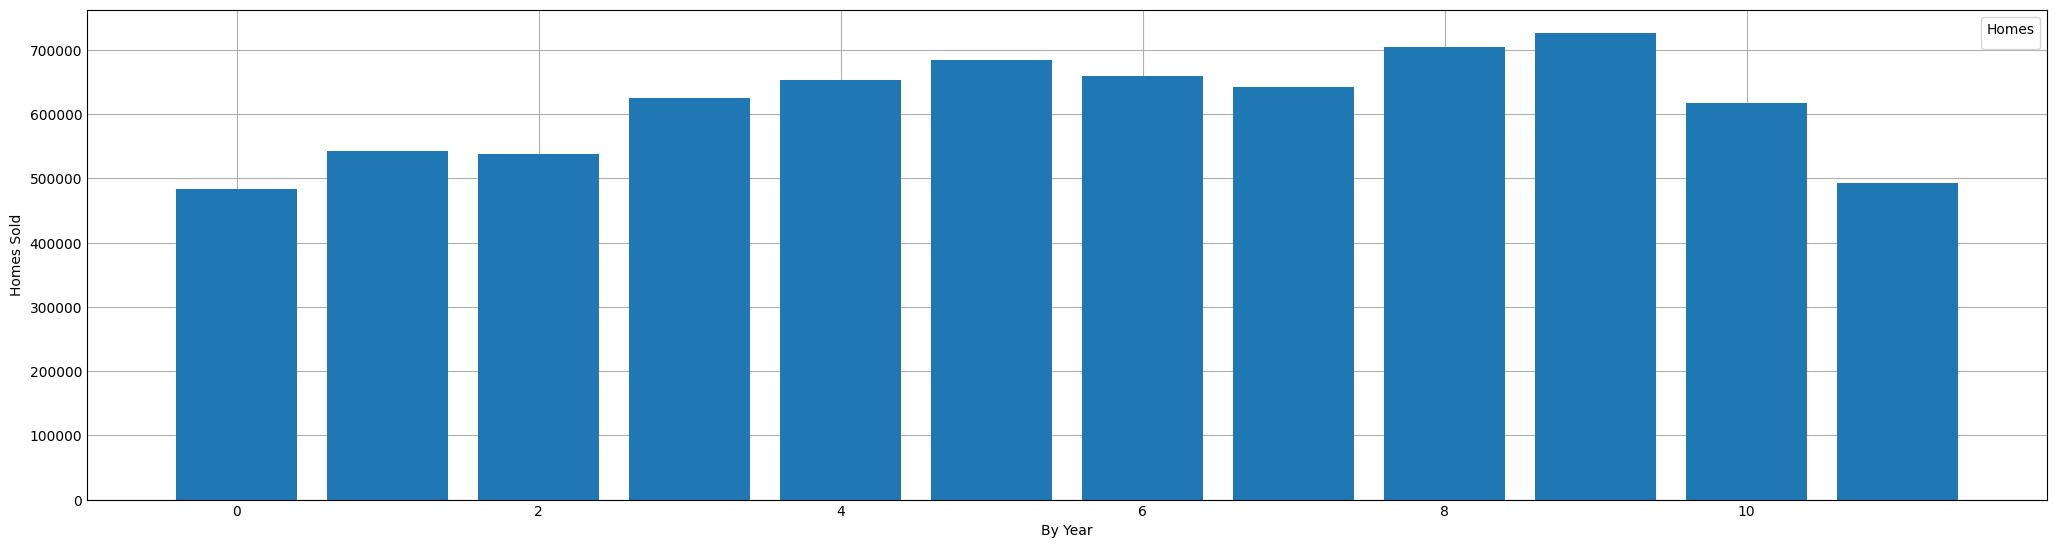

In [63]:
#bar graph
fig, ax = plt.subplots(figsize=(20,5) )
ax.bar(df3['year'], df3['Homes Sold'])

ax.set_ylabel('Homes Sold')
ax.set_xlabel('By Year')
ax.legend(title='Homes')

plt.show()

MILSTONE1:This next graph is comparing the sale to list ratio with the inventory. Inventory is the total number of active listings plus pending sales. The sale to list ratio is the amount that the house is sold for compared to the asking price. So, we can see that when the inventory is low, people offer way above the asking price, versus when the inventory is high. 

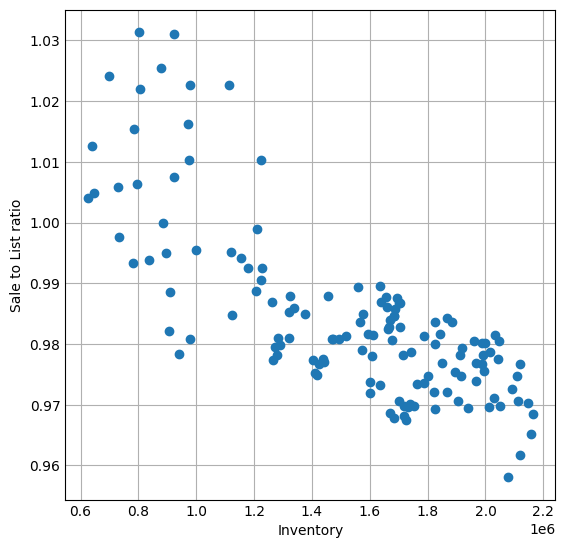

In [64]:
#scatter plot comparing inventory to sale to list ratio
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(df3['Inventory'], df3['Average Sale To List'])
ax.set_ylabel('Sale to List ratio')
ax.set_xlabel('Inventory')
plt.show()

MILSTONE1: This graph I decided to do see if there was a correlation between the number of days that a house was on the market versus how many new listings that there were. There doesn't appear to a very obvious conclusion that can be gleaned from this graph. I was expecting to see that, the fewer new listings that there were, that would decrease their time on the market. However, it looks like the opposite has a larger correlation. Whenever the new listings have been above 650,000 per month, the average days on the market have all been below 60 days. And when there are below 400,000 new listings in a given month, the days on the market stays between 40 and 80 days. There are many factors that can effect the number of new listings on the market, along with supply and demand that might be difficult to discern from this graph. 

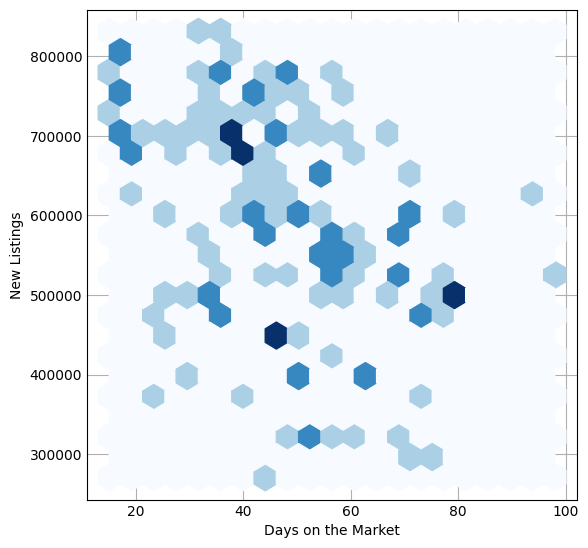

In [65]:
fig, ax = plt.subplots(figsize=(5,5))
ax.hexbin(df3['Days on Market'], df3['New Listings'], gridsize=20)
ax.set_ylabel('New Listings')
ax.set_xlabel('Days on the Market')
plt.show()

CITATIONS:

Freddie Mac, 30-Year Fixed Rate Mortgage Average in the United States [MORTGAGE30US], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/MORTGAGE30US, July 26, 2023.

Redfin, Redfin Monthly Housing Market Data; https://www.redfin.com/news/data-center/, June 11, 2023

U.S. Bureau of Labor Statistics; https://data.bls.gov/timeseries/CUUR0000SA0L1E?output_view=pct_12mths, July 26,2023

